# Task 2: Descriptive Analysis

In [174]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

## a) Temporal Patterns & Seasonality

In this subsection, we want to find and explore temporal patterns as well as seasonality within the preprocessed data set.

In [175]:
# Read in our pre-processed dataset

temporal_df = pd.read_pickle("./data/prepared/preparedData.pkl")
temporal_df

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [176]:
# Separate the attribute 'connectionTime' which is in a datetime format into serveral columns (hour, date, year) 

temporal_df["hour"] = temporal_df['connectionTime'].dt.hour
temporal_df["date"] = temporal_df['connectionTime'].dt.date
temporal_df["year"] = temporal_df['connectionTime'].dt.year
temporal_df

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,hour,date,year
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,...,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",13,2020-01-02,2020
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,...,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",13,2020-01-02,2020
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,...,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",13,2020-01-02,2020
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,...,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",13,2020-01-02,2020
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,...,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",14,2020-01-02,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,...,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT",19,2019-07-01,2019
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,...,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT",19,2019-07-01,2019
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,...,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT",20,2019-07-01,2019
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,...,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",21,2019-07-01,2019


In [177]:
# Create a new column with an ascending index of each row in order to count the connections

connections = temporal_df.index
temporal_df["connections"]= connections

### Connections per Hour

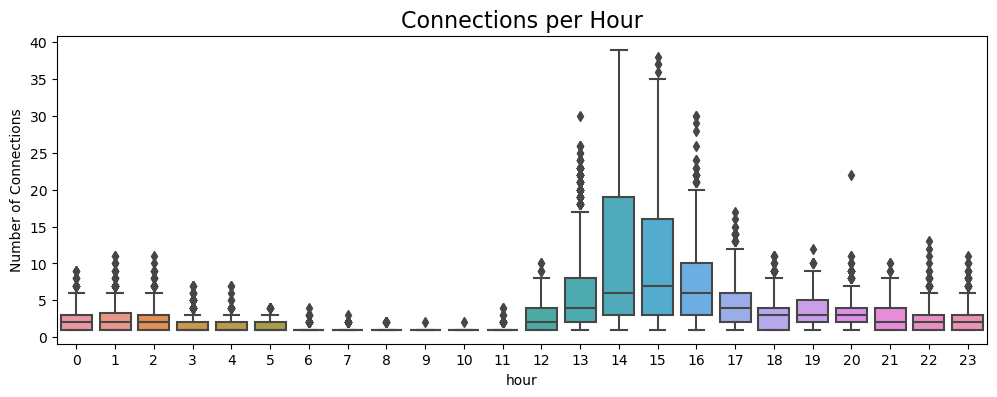

In [178]:
# Create a boxplot of connections per day over the whole data set

connections_per_hour = temporal_df.groupby(["date","hour"])["connections"].nunique()
connections_per_hour = pd.DataFrame(connections_per_hour)
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=connections_per_hour.index.get_level_values(1), y=connections_per_hour["connections"],ax=ax)
ax.set_title("Connections per Hour",fontsize=16)
plt.ylabel("Number of Connections")
#plt.savefig("connections_per_hour.png")
plt.show()

As you can see in the barplot above, there is a very strange shift on the time axis. You should be expecting connections to peak in the morning and not at midday. It is particularly striking that no connections were registered at the beginning of the working day. While searching for the cause, it becomes apparent that the connection time is measured according to GMT. However, Los Angeles is in a different time zone, which is GMT-8. It is therefore necessary to recalculate the connection time by subtracting eight from each value. To ensure that we still come up with a new reasonable value, it is important to keep it in the range of 0 to 23 via additional operations. 

In [179]:
# Recalculate the "hour" column in a copy of the original dataframe

gmt_8 = temporal_df.copy()

gmt_8["hour"] = (gmt_8["hour"] - 8) % 24
gmt_8["hour"] = gmt_8["hour"].astype(int)

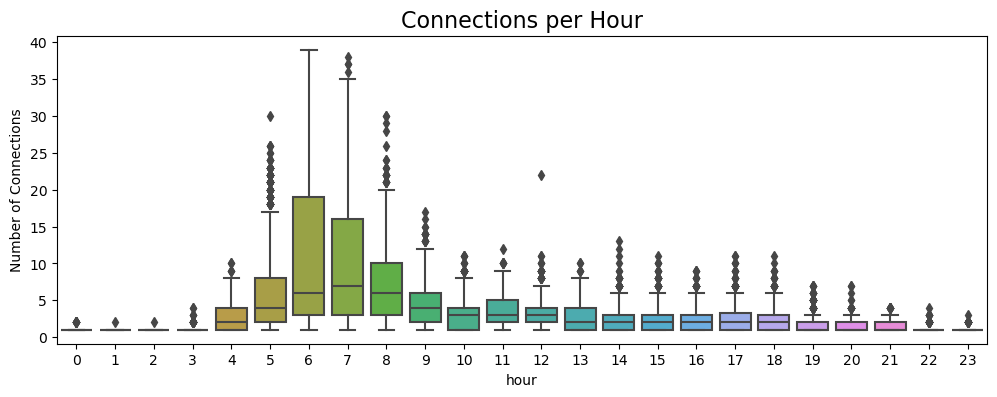

In [180]:
# Create a new boxplot of connections per day

connections_per_hour8 = gmt_8.groupby(["date","hour"])["connections"].nunique()
connections_per_hour8 = pd.DataFrame(connections_per_hour8)
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=connections_per_hour8.index.get_level_values(1), y=connections_per_hour8["connections"],ax=ax)
ax.set_title("Connections per Hour",fontsize=16)
plt.ylabel("Number of Connections")
plt.savefig("connections_per_hour_gmt8.png")
plt.show()

This new plot, which is based on the previously recalculated connection times according to GMT-8, makes much more sense in the context of the use case. You can observe a peak in the number of connections at 6 o'clock. During the night, on the other hand, there are no new connections.

### Connections per Day

In [181]:
# Counting the number of connections per day 

connections_per_weekday = temporal_df.groupby(["date","weekday"])["connections"].nunique()
connections_per_weekday= pd.DataFrame(connections_per_weekday)

In [182]:
# Rewrite the numerical entries of the weekday into nominal abbreviations for better readability

weekday_abbr = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
connections_per_weekday.index = connections_per_weekday.index.set_levels(connections_per_weekday.index.levels[1].map(weekday_abbr), level=1)
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

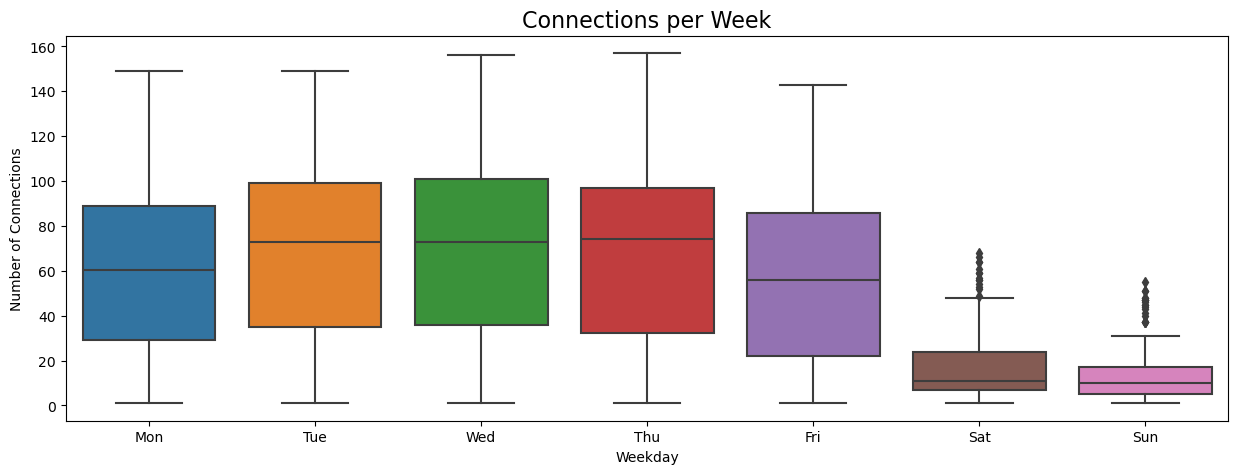

In [183]:
# Create a boxplot of the connections per week over the whole data set

fig,ax = plt.subplots(figsize=(15,5)) 

sns.boxplot(x=connections_per_weekday.index.get_level_values(1), y=connections_per_weekday["connections"],ax=ax, order=weekday_order)
ax.set_title("Connections per Week",fontsize=16)
plt.xlabel("Weekday")
plt.ylabel("Number of Connections")
#plt.savefig("weekdemand.png")
plt.show()

As you can observe in the plot, the weekdays in the center of the business week have the most connections. Furthermore, they are the most stable ones. Both on Monday and Friday, the start and end of the working week, the connections are slightly lower. This could be due to fact that many people use these days to extended their weekend. These can also be the favoured days for working from home. On the weekend we can see an immensive drop in the number of connections. Probably due to the lack of usage of the private company site. We can also observe many outliers on these two days.

### Connections per Month

In [184]:
# Dict to convert month attribute in the same manner as the weekday

month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [185]:
# Create a new dataframe that counts the connections for each month regarding each year and sort them in ascending manner 

d = []
for year in temporal_df["year"].unique():
    for month in range(1, 13):
        count = temporal_df[(temporal_df["year"] == year) & (temporal_df["month"] == month)].shape[0]
        d.append({
            "Year": year,
            "Month": month,
            "Count": count
        })

all_year = pd.DataFrame(d)
all_year = all_year.sort_values(by=["Year", "Month"])

In [186]:
# Rewrite the entries in "Month" for better readability

all_year["Month"] = all_year["Month"].apply(lambda x: month_dict[x])

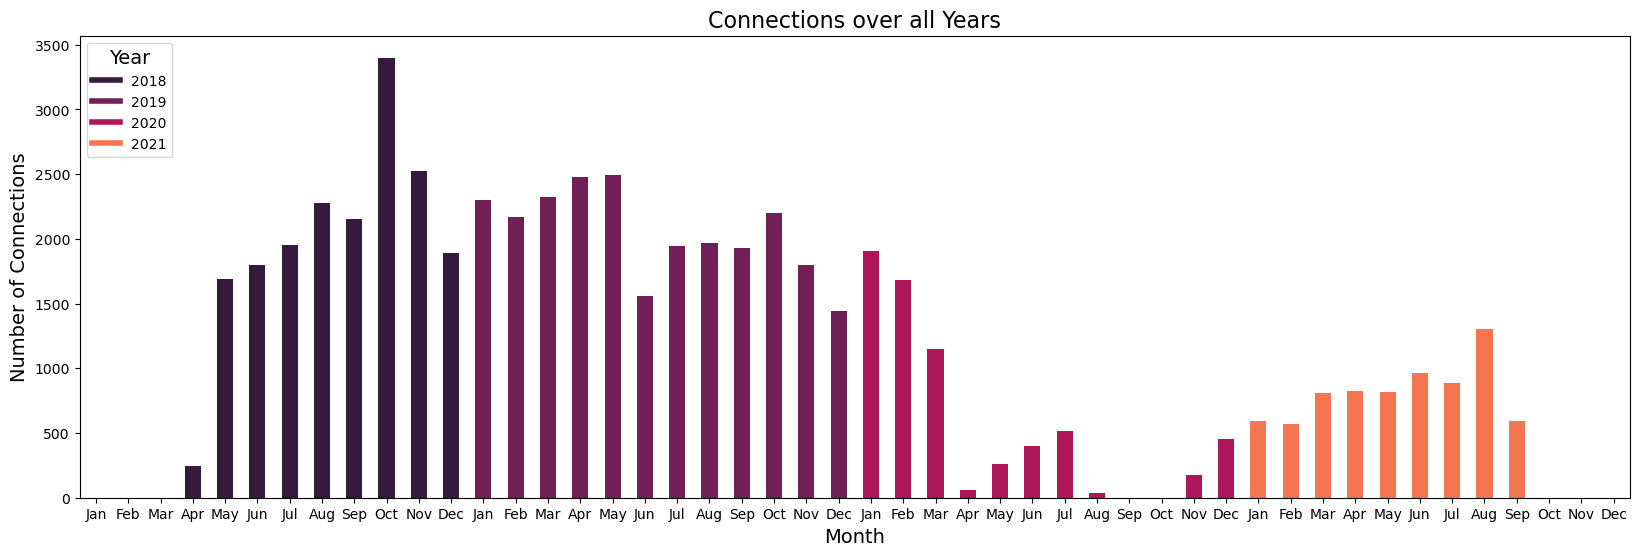

In [187]:
# Adjusted color mapping to ensure better readability of the resulting plot

year_color_mapping = {2018: (0.20973515, 0.09747934, 0.24238489), 
                      2019: (0.43860848, 0.12177004, 0.34119475), 
                      2020: (0.67824099, 0.09192342, 0.3504148), 
                      2021: (0.95381595, 0.46373781, 0.31769923)}
all_year["Color"] = all_year["Year"].map(year_color_mapping)

# Plot a barplot that shows the connections per month over the course of all years  

ax = all_year.plot.bar(x="Month", y="Count", rot=0, figsize=(20, 6), color=all_year["Color"])
ax.set_title("Connections over all Years", fontsize=16)
plt.ylabel("Number of Connections", fontsize=14)
plt.xlabel("Month", fontsize=14)
legend_labels = [str(year) for year in all_year["Year"].unique()]
legend_colors = [plt.Line2D([0], [0], color=year_color_mapping[year], lw=4) for year in all_year["Year"].unique()]
ax.legend(legend_colors, legend_labels, title="Year", title_fontsize=14, loc="upper left")
#plt.savefig("yeardemand.png")
plt.show()

In [188]:
# Count the connections for each month regarding year 2018 

d18 = []
for i in range(1, 13):
    d18.append(
        {
            "Month": i,
            "Count": temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2018)].month.count()
        }
    )
year18 = pd.DataFrame(d18)
year18

,Month,Count
0,1,0
1,2,0
2,3,0
3,4,246
4,5,1688
5,6,1796
6,7,1955
7,8,2280
8,9,2155
9,10,3400


In [189]:
# Rewrite as mentioned before

year18["Month"] = year18["Month"].apply(lambda x: month_dict[x])

In [190]:
# Count the connections for each month regarding year 2019

d19 = []
for i in range(1, 13):
    d19.append(
        {
            "Month": i,
            "Count": temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2019)].month.count()
        }
    )
year19 = pd.DataFrame(d19)
year19

,Month,Count
0,1,2303
1,2,2167
2,3,2323
3,4,2479
4,5,2494
5,6,1556
6,7,1942
7,8,1972
8,9,1930
9,10,2199


In [191]:
# Rewrite as already mentioned before

year19["Month"] = year19["Month"].apply(lambda x: month_dict[x])

In [192]:
# Count the connections for each month regarding year 2020

d20 = []
for i in range(1, 13):
    d20.append(
        {
            "Month": i,
            "Count": temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2020)].month.count()
        }
    )
year20 = pd.DataFrame(d20)
year20

,Month,Count
0,1,1906
1,2,1685
2,3,1153
3,4,62
4,5,258
5,6,401
6,7,517
7,8,33
8,9,0
9,10,0


In [193]:
# Rewrite as already mentioned before

year20["Month"] = year20["Month"].apply(lambda x: month_dict[x])

In [194]:
# Count the connections for each month regarding year 2021

d21 = []
for i in range(1, 13):
    d21.append(
        {
            "Month": i,
            "Count": temporal_df[(temporal_df["month"] == i) & (temporal_df["year"] == 2021)].month.count()
        }
    )
year21 = pd.DataFrame(d21)
year21

,Month,Count
0,1,589
1,2,566
2,3,807
3,4,824
4,5,815
5,6,965
6,7,883
7,8,1304
8,9,596
9,10,0


In [195]:
# Rewrite as already mentioned before

year21["Month"] = year21["Month"].apply(lambda x: month_dict[x])

### Connections per Season

In [196]:
# Ccount connections with respect to the season based on the repective year 2018

seasons18 = pd.DataFrame()

seasons18["Season"] = ["Winter", "Spring", "Summer", "Autumn"]
seasons18["Count"] = [year18[year18["Month"]=="Dec"].Count.iloc[0] + year18[year18["Month"]=="Jan"].Count.iloc[0] + year18[year18["Month"]=="Feb"].Count.iloc[0],
                    year18[year18["Month"]=="Mar"].Count.iloc[0] + year18[year18["Month"]=="Apr"].Count.iloc[0] + year18[year18["Month"]=="May"].Count.iloc[0],
                    year18[year18["Month"]=="Jun"].Count.iloc[0] + year18[year18["Month"]=="Jul"].Count.iloc[0] + year18[year18["Month"]=="Aug"].Count.iloc[0],
                    year18[year18["Month"]=="Sep"].Count.iloc[0] + year18[year18["Month"]=="Oct"].Count.iloc[0] + year18[year18["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons18

,Season,Count
0,Winter,1889
1,Spring,1934
2,Summer,6031
3,Autumn,8081


In [197]:
# Ccount connections with respect to the season based on the repective year 2019

seasons19 = pd.DataFrame()

seasons19["Season"] = ["Winter", "Spring", "Summer", "Autumn"]
seasons19["Count"] = [year19[year19["Month"]=="Dec"].Count.iloc[0] + year19[year19["Month"]=="Jan"].Count.iloc[0] + year19[year19["Month"]=="Feb"].Count.iloc[0],
                      year19[year19["Month"]=="Mar"].Count.iloc[0] + year19[year19["Month"]=="Apr"].Count.iloc[0] + year19[year19["Month"]=="May"].Count.iloc[0],
                      year19[year19["Month"]=="Jun"].Count.iloc[0] + year19[year19["Month"]=="Jul"].Count.iloc[0] + year19[year19["Month"]=="Aug"].Count.iloc[0],
                      year19[year19["Month"]=="Sep"].Count.iloc[0] + year19[year19["Month"]=="Oct"].Count.iloc[0] + year19[year19["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons19

,Season,Count
0,Winter,5910
1,Spring,7296
2,Summer,5470
3,Autumn,5927


In [198]:
# Ccount connections with respect to the season based on the repective year 2020

seasons20 = pd.DataFrame()

seasons20["Season"] = ["Winter", "Spring", "Summer", "Autumn"]
seasons20["Count"] = [year20[year20["Month"]=="Dec"].Count.iloc[0] + year20[year20["Month"]=="Jan"].Count.iloc[0] + year20[year20["Month"]=="Feb"].Count.iloc[0],
                    year20[year20["Month"]=="Mar"].Count.iloc[0] + year20[year20["Month"]=="Apr"].Count.iloc[0] + year20[year20["Month"]=="May"].Count.iloc[0],
                    year20[year20["Month"]=="Jun"].Count.iloc[0] + year20[year20["Month"]=="Jul"].Count.iloc[0] + year20[year20["Month"]=="Aug"].Count.iloc[0],
                    year20[year20["Month"]=="Sep"].Count.iloc[0] + year20[year20["Month"]=="Oct"].Count.iloc[0] + year20[year20["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons20

,Season,Count
0,Winter,4048
1,Spring,1473
2,Summer,951
3,Autumn,177


In [199]:
# Ccount connections with respect to the season based on the repective year 2021

seasons21 = pd.DataFrame()

seasons21["Season"] = ["Winter", "Spring", "Summer", "Autumn"]
seasons21["Count"] = [year21[year21["Month"]=="Dec"].Count.iloc[0] + year21[year21["Month"]=="Jan"].Count.iloc[0] + year21[year21["Month"]=="Feb"].Count.iloc[0],
                    year21[year21["Month"]=="Mar"].Count.iloc[0] + year21[year21["Month"]=="Apr"].Count.iloc[0] + year21[year21["Month"]=="May"].Count.iloc[0],
                    year21[year21["Month"]=="Jun"].Count.iloc[0] + year21[year21["Month"]=="Jul"].Count.iloc[0] + year21[year21["Month"]=="Aug"].Count.iloc[0],
                    year21[year21["Month"]=="Sep"].Count.iloc[0] + year21[year21["Month"]=="Oct"].Count.iloc[0] + year21[year21["Month"]=="Nov"].Count.iloc[0]
                   ]
seasons21

,Season,Count
0,Winter,1155
1,Spring,2446
2,Summer,3152
3,Autumn,596


In [200]:
# Rewrite the seasons form numerical values to nominal values for improved readability 

def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
temporal_df["Season"] = temporal_df["month"].apply(month_to_season)

# Order the entries regarding a defined season order

season_order = ["Winter", "Spring", "Summer", "Autumn"]
temporal_df["Season"] = pd.Categorical(temporal_df["Season"], categories=season_order, ordered=True)

# Count the number of occurrence for each combination of "year" and "season" 

all_season = temporal_df.groupby(["year", "Season"]).size().reset_index(name="Count")
all_season

C:\Users\Nils\AppData\Local\Temp\ipykernel_34116\958569205.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_season = temporal_df.groupby(["year", "Season"]).size().reset_index(name="Count")


,year,Season,Count
0,2018,Winter,1889
1,2018,Spring,1934
2,2018,Summer,6031
3,2018,Autumn,8081
4,2019,Winter,5910
5,2019,Spring,7296
6,2019,Summer,5470
7,2019,Autumn,5927
8,2020,Winter,4048
9,2020,Spring,1473


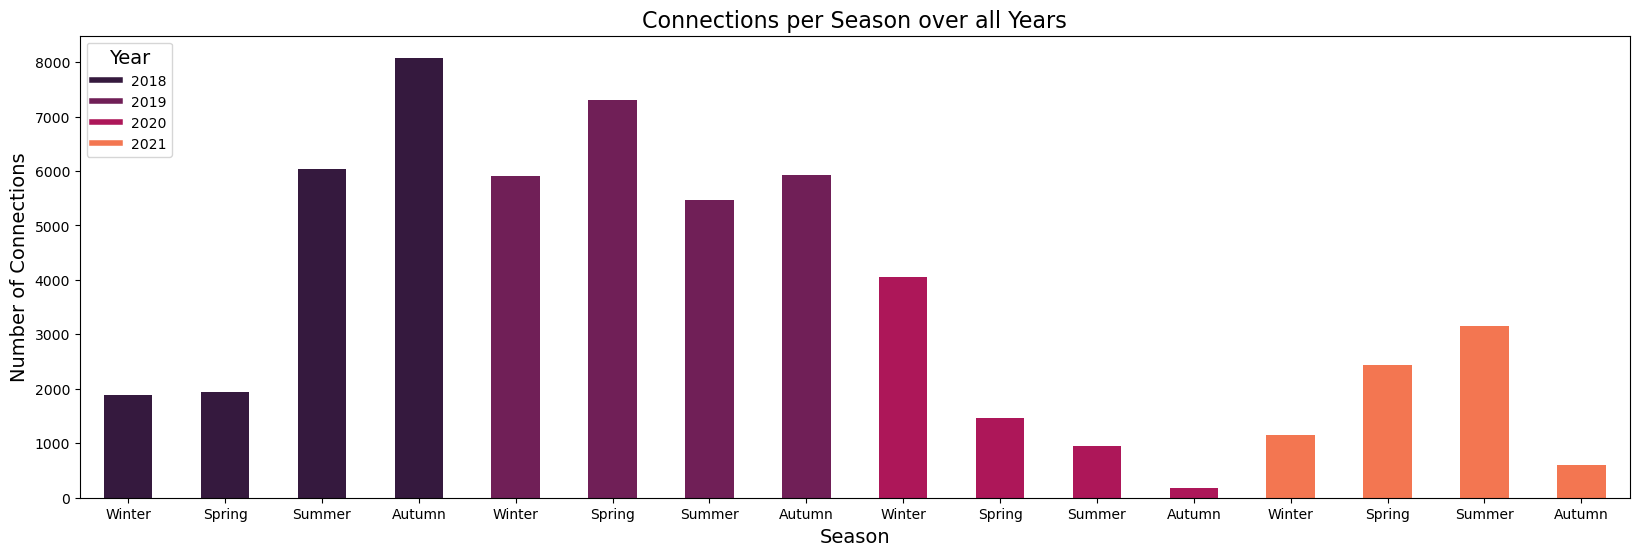

In [201]:
# Again execute the color mapping from above for better readability in the resulting plot

all_season["Color"] = all_season["year"].map(year_color_mapping)

# Create barplot

ax = all_season.plot.bar(x="Season", y="Count", rot=0, figsize=(20, 6), color=all_season["Color"])
ax.set_title("Connections per Season over all Years", fontsize=16)
plt.ylabel("Number of Connections", fontsize=14)
plt.xlabel("Season", fontsize=14)

# Insert legend

legend_labels = [str(season) for season in all_season['year'].unique()]
legend_colors = [plt.Line2D([0], [0], color=year_color_mapping[year], lw=4) for year in all_season['year'].unique()]
ax.legend(legend_colors, legend_labels, title='Year', title_fontsize='14', loc='upper left')

#plt.savefig("seasondemand.png")
plt.show()